In [196]:
import numpy as np

In [197]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
plt.rcParams['font.family'] = 'serif'

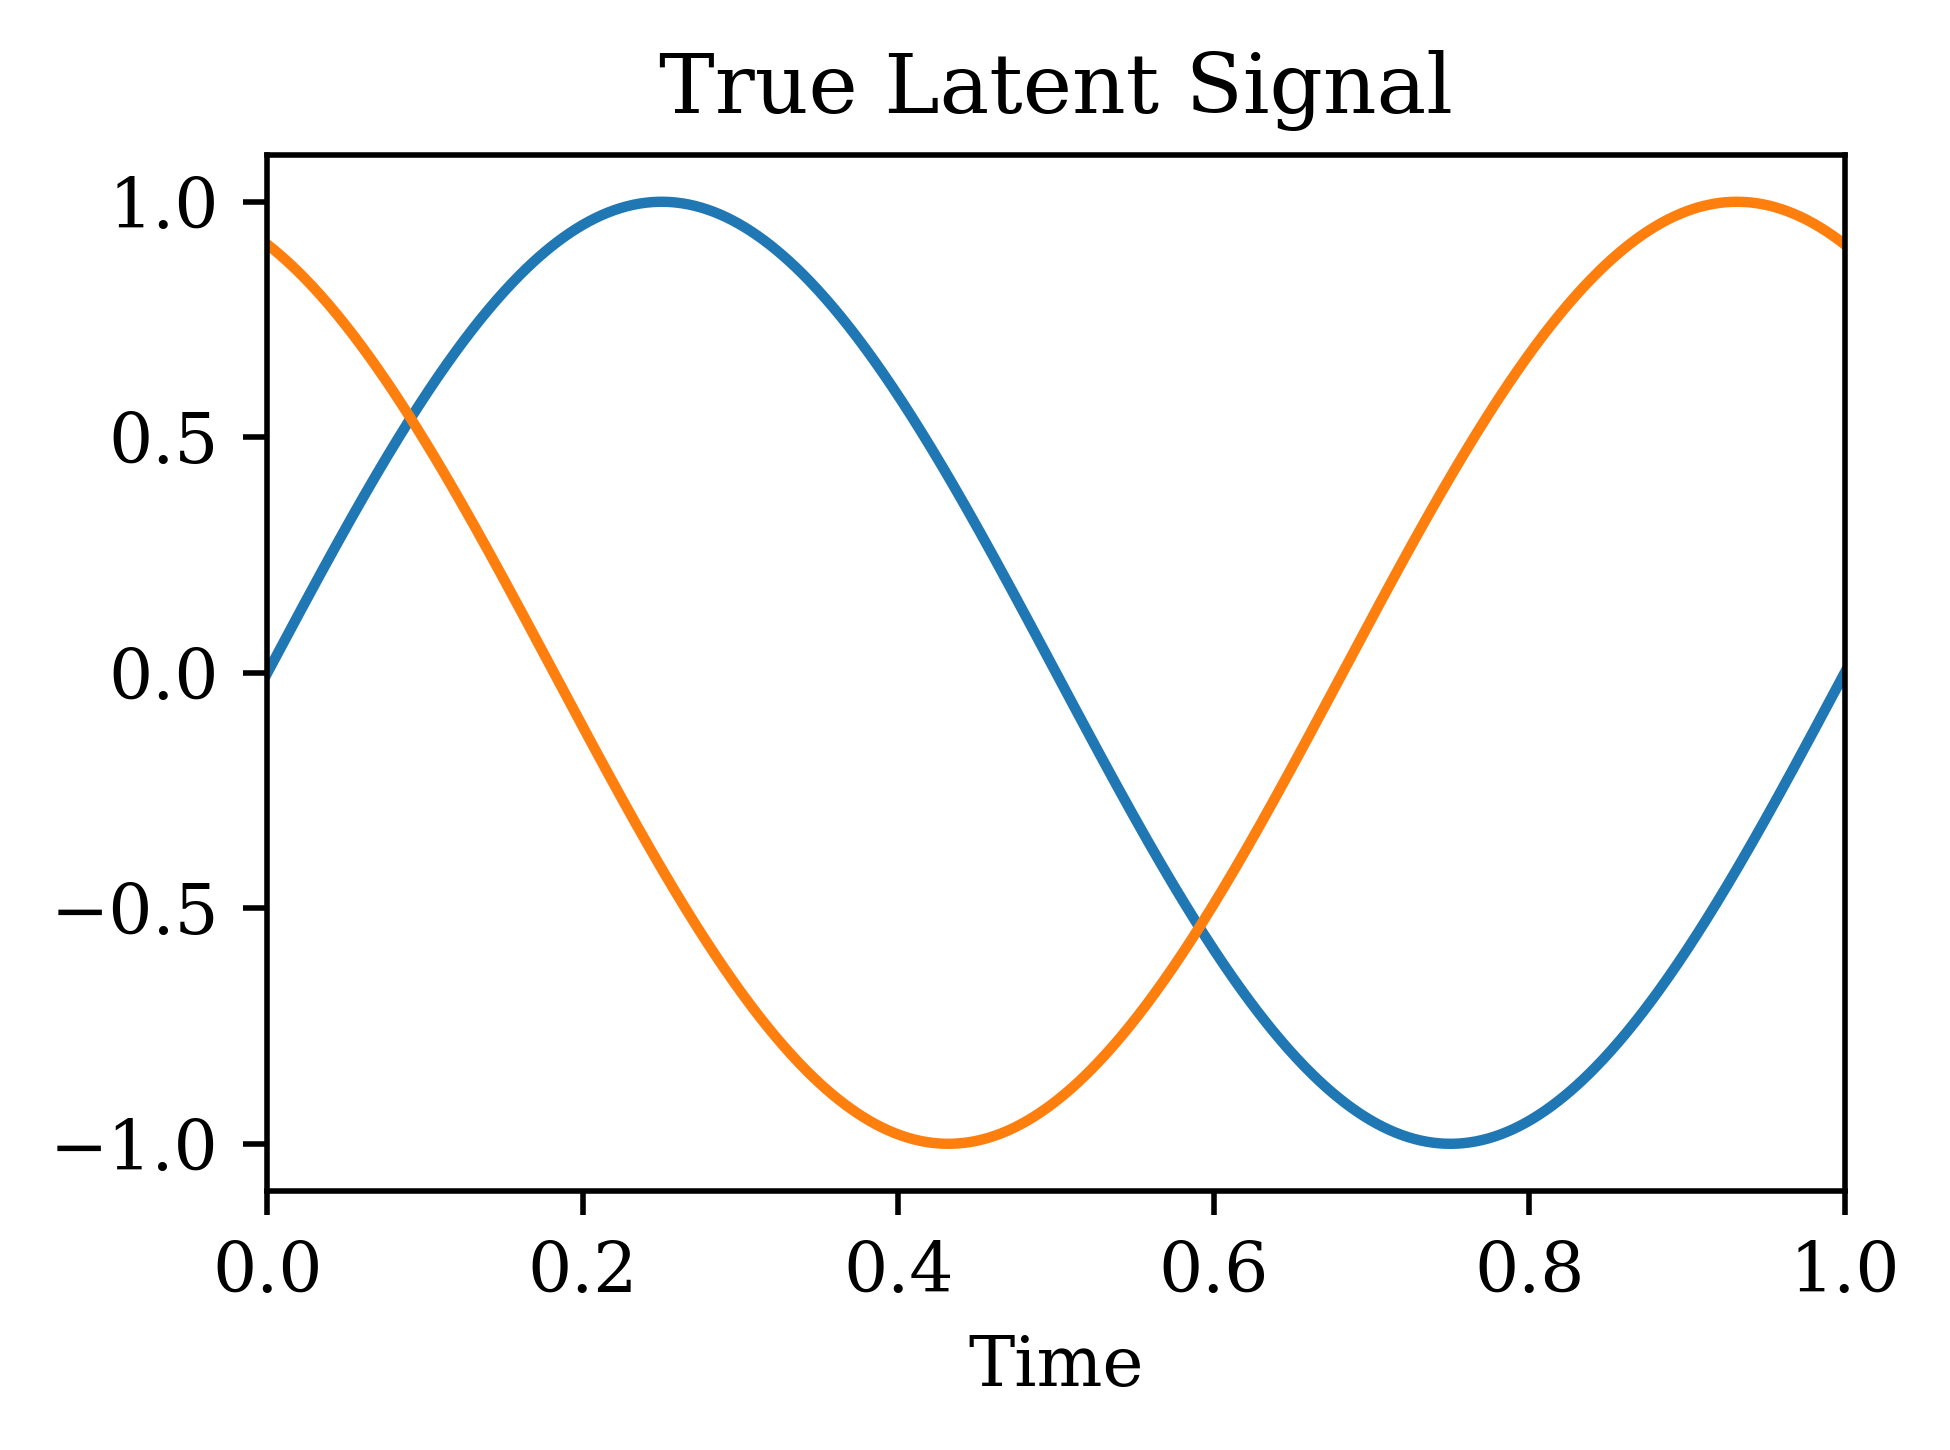

In [211]:
fig = plt.figure(figsize=(4, 3), dpi=500)
t = np.arange(0, 1.2, 0.001)
y1 = np.sin(2 * np.pi * t)
y2 = np.sin(2 * np.pi * t + 2.0)
plt.plot(t, y1)
plt.plot(t, y2)
plt.xlim(0, 1)
plt.xlabel('Time')
plt.title('True Latent Signal')
fig.tight_layout()
plt.savefig('sine_signal.png')
plt.show()

In [212]:
print(t.shape)

(1200,)


In [213]:
from scipy.linalg import expm, logm

In [214]:
def create_symmetric_matrix(upper):
    mat = np.zeros((5, 5))
    mat[0, :] = upper[:5]
    mat[1, 1:] = upper[5:9]
    mat[2, 2:] = upper[9:12]
    mat[3, 3:] = upper[12:14]
    mat[4, 4] = upper[14]
    for i in range(1, 5):
        for j in range(i):
            mat[i, j] = mat[j, i]
    return mat

In [215]:
F = np.zeros((1200, 2))
F[:, 0] = y1
F[:, 1] = y2

In [291]:
B = np.random.normal(0, 0.5, [2, 15])

In [292]:
log_series = np.matmul(F, B)
print(log_series.shape)

(1200, 15)


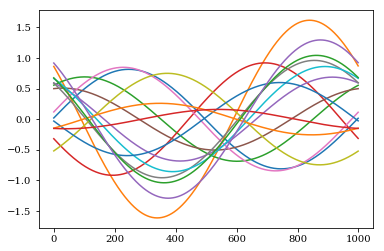

In [293]:
for j in range(15):
    plt.plot(log_series[:1000, j])
plt.show()

In [294]:
cov_series = np.zeros((1200, 5, 5))
for i in range(1200):
    cov_series[i, :, :] = expm(create_symmetric_matrix(log_series[i, :]))

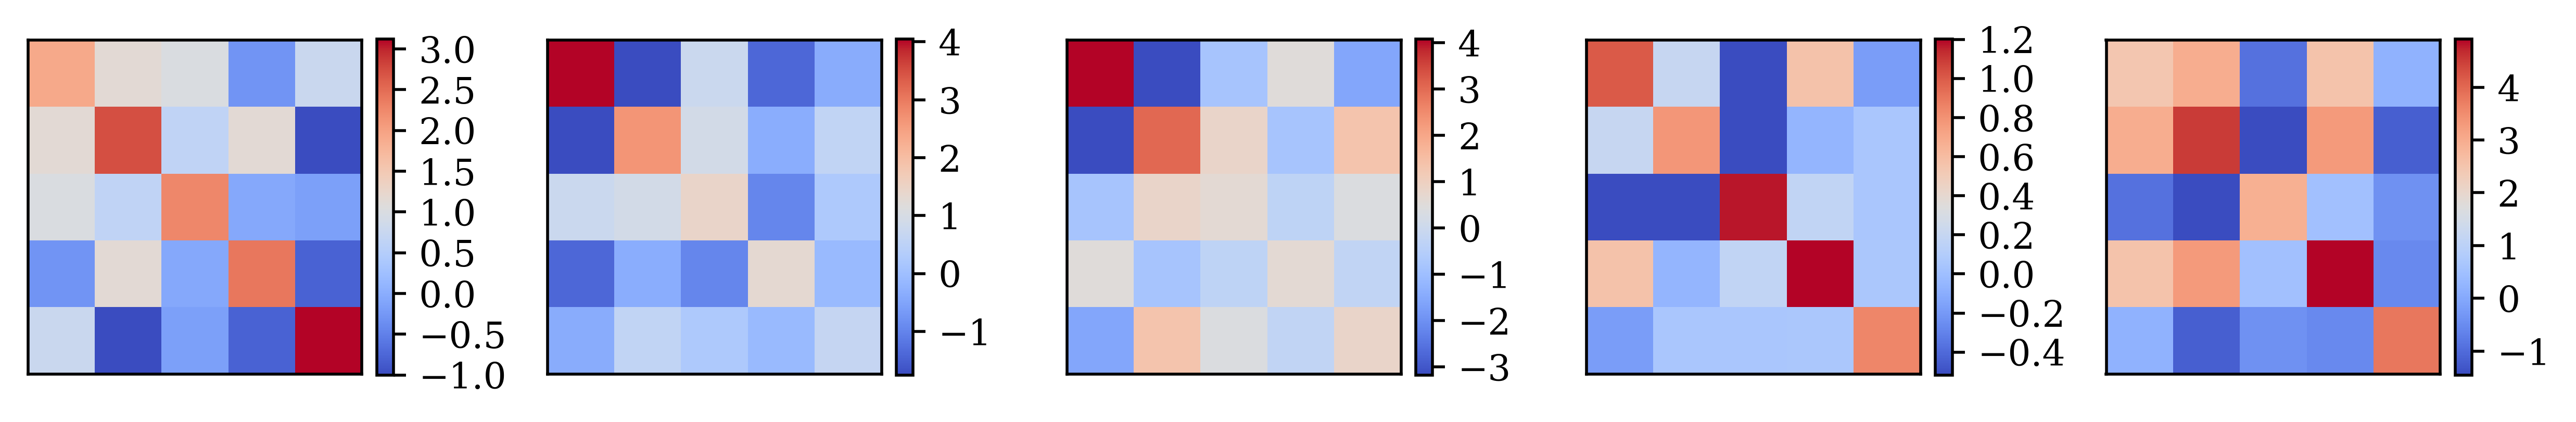

In [301]:
fig = plt.figure(figsize=(10, 2), dpi=500)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(cov_series[i * 200, :, :], cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(fraction=0.046, pad=0.04)
fig.tight_layout()
plt.savefig('sine_cov.png')
plt.show()

In [302]:
time_series = np.zeros((1200, 5))
for i in range(1200):
    time_series[i, :] = np.random.multivariate_normal(np.zeros(5), cov_series[i, :, :], 1)

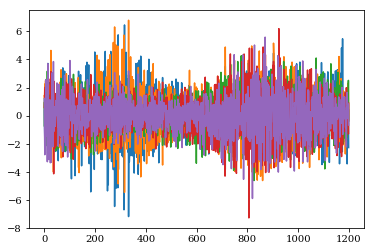

In [303]:
for j in range(5):
    plt.plot(time_series[:, j])
plt.show()

In [304]:
print(time_series.shape)

(1200, 5)


In [305]:
cov_series_hat = np.zeros((100, 5, 5))
log_series_hat = np.zeros((100, 15))
for t in range(100):
    sliding_window = time_series[(t * 10):(t * 10 + 100), :]
    cov_hat = np.cov(sliding_window, rowvar=False)
    cov_series_hat[t, :, :] = cov_hat
    log_hat = logm(cov_hat)[np.triu_indices(5)]
    log_series_hat[t, :] = log_hat

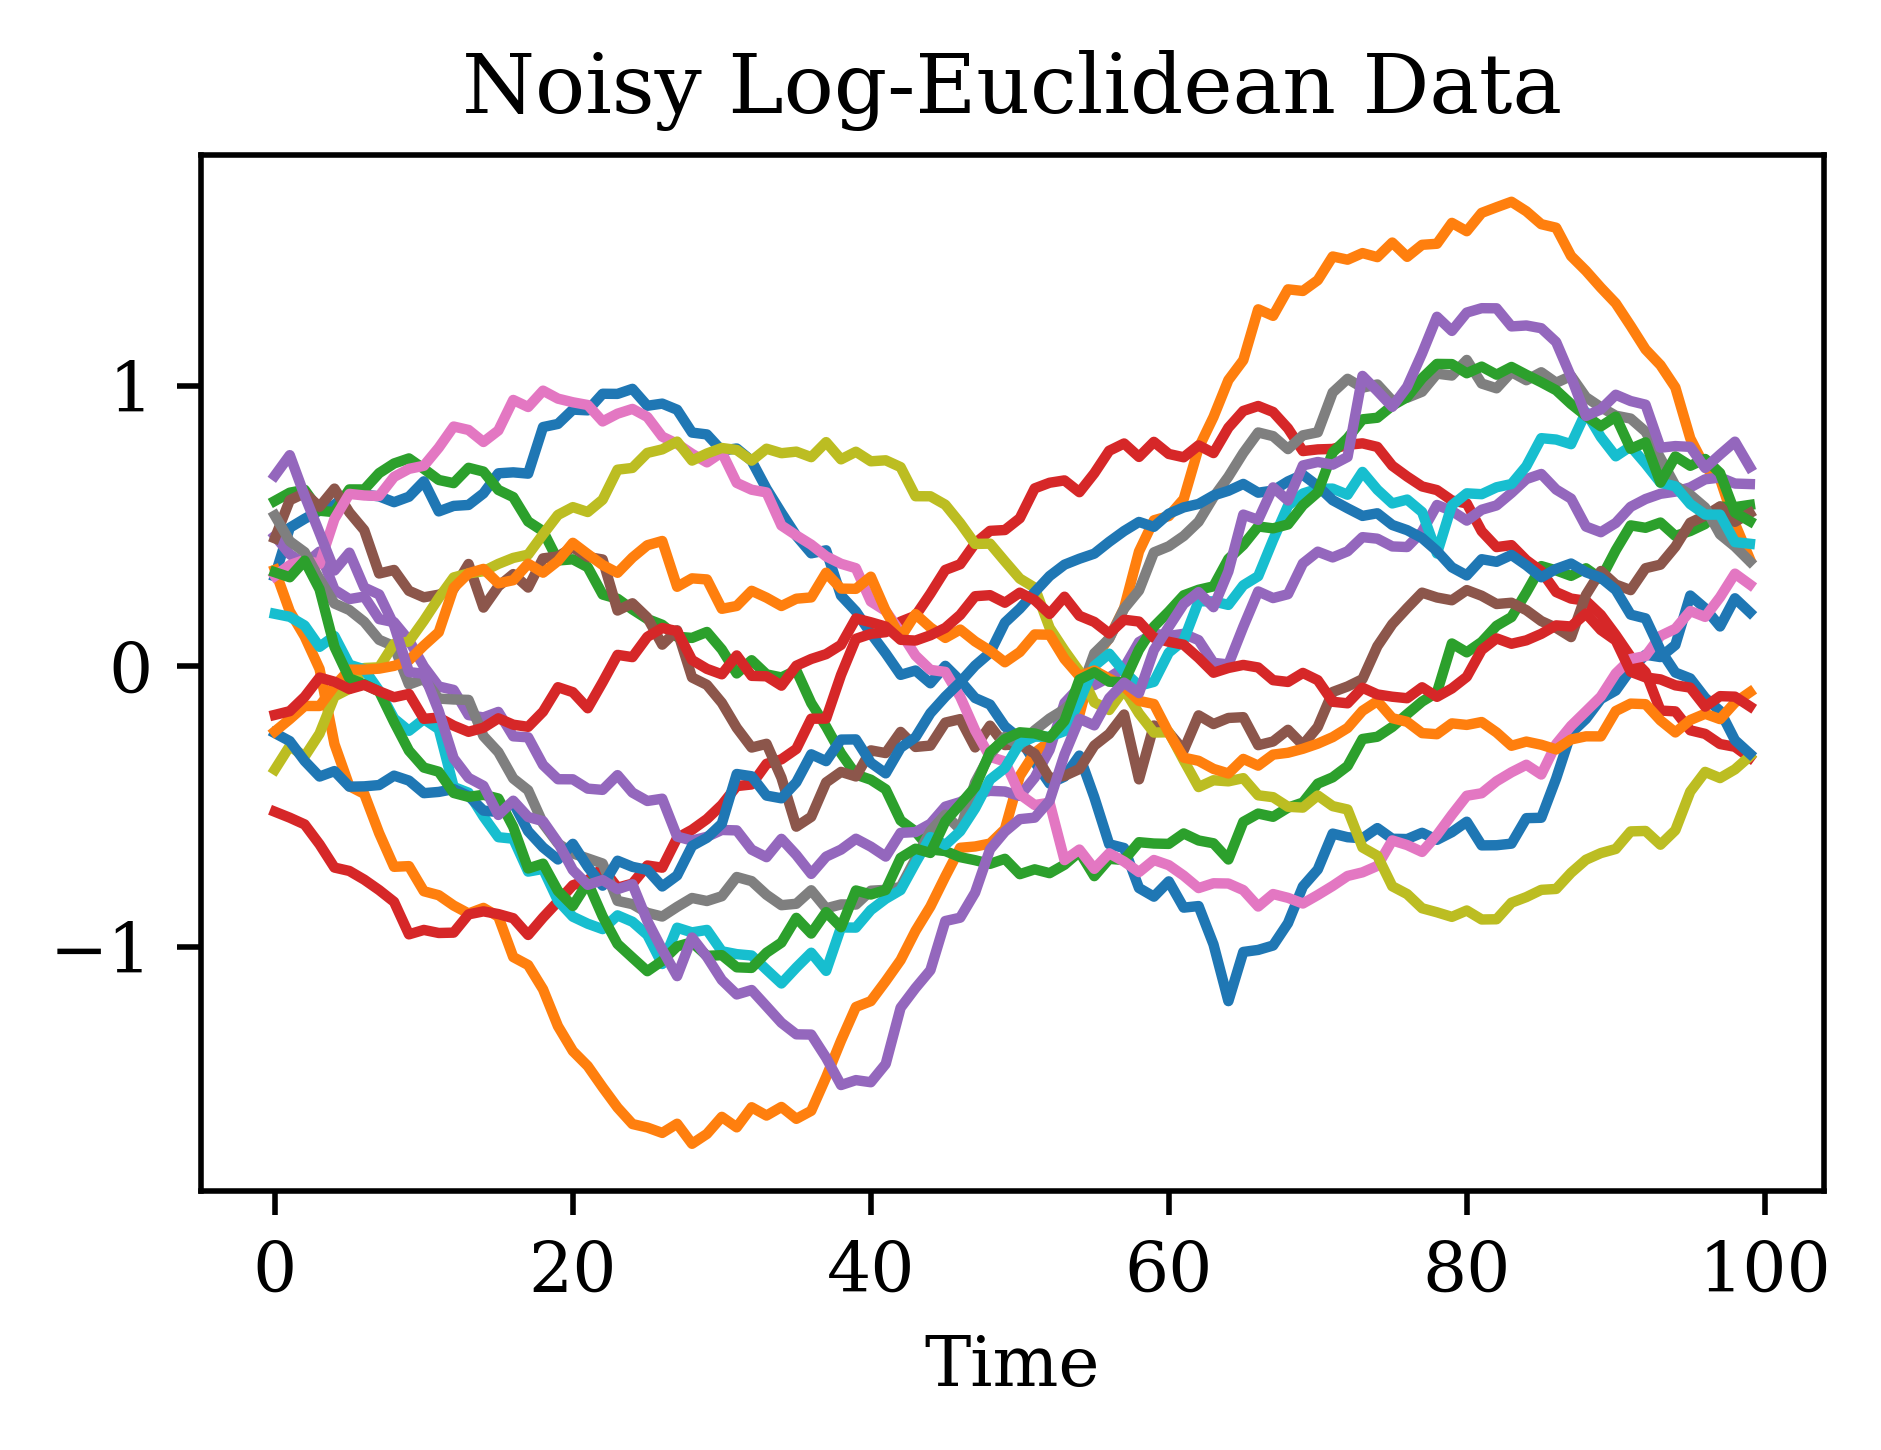

In [307]:
fig = plt.figure(figsize=(4, 3), dpi=500)
for j in range(15):
    plt.plot(log_series_hat[:, j])
plt.xlabel('Time')
plt.title('Noisy Log-Euclidean Data')
fig.tight_layout()
plt.savefig('sine_data.png')
plt.show()

In [279]:
Y = log_series_hat
print(Y.shape)

(100, 15)


In [280]:
from factorgp import FactorGP
from inference import run_gibbs

In [281]:
dims = [1, 100, 15, 2]
model = FactorGP(dims)
model.update_conditional_latent(Y)

In [282]:
results = run_gibbs(Y, model, 50, 50, 0.5, verbose=True)

  2%|▏         | 1/50 [00:10<08:17, 10.16s/it]

Current MSE: 0.0197612112861
Current length scale: [10. 10.]


  4%|▍         | 2/50 [00:20<08:13, 10.28s/it]

Current MSE: 0.0162327070087
Current length scale: [10.74858972 10.72325499]


  6%|▌         | 3/50 [00:30<08:00, 10.23s/it]

Current MSE: 0.0151507354838
Current length scale: [11.09458561 10.71687687]


  8%|▊         | 4/50 [00:41<07:58, 10.41s/it]

Current MSE: 0.0149055200423
Current length scale: [12.03220358 10.51719337]


 10%|█         | 5/50 [00:51<07:40, 10.24s/it]

Current MSE: 0.0146554164157
Current length scale: [11.3883568  11.31605654]


 12%|█▏        | 6/50 [01:01<07:26, 10.15s/it]

Current MSE: 0.0151371972085
Current length scale: [11.95303572 11.50823465]


 14%|█▍        | 7/50 [01:11<07:14, 10.11s/it]

Current MSE: 0.0151263137689
Current length scale: [11.84102461 11.97647694]


 16%|█▌        | 8/50 [01:21<06:58,  9.97s/it]

Current MSE: 0.0146833655834
Current length scale: [12.55256535 12.4788679 ]


 18%|█▊        | 9/50 [01:31<06:51, 10.04s/it]

Current MSE: 0.0139079449594
Current length scale: [12.61704463 12.65844774]


 20%|██        | 10/50 [01:41<06:40, 10.00s/it]

Current MSE: 0.014619256843
Current length scale: [12.04236567 12.10929385]


 22%|██▏       | 11/50 [01:51<06:37, 10.20s/it]

Current MSE: 0.0156406576545
Current length scale: [12.58040292 12.09043716]


 24%|██▍       | 12/50 [02:02<06:30, 10.28s/it]

Current MSE: 0.0150001455773
Current length scale: [12.43270857 11.69904551]


 26%|██▌       | 13/50 [02:12<06:16, 10.16s/it]

Current MSE: 0.0144942318225
Current length scale: [12.99589135 11.12178999]


 28%|██▊       | 14/50 [02:21<05:59,  9.99s/it]

Current MSE: 0.014651603553
Current length scale: [13.5986675  11.14819973]


 30%|███       | 15/50 [02:31<05:47,  9.93s/it]

Current MSE: 0.0149054038134
Current length scale: [13.82956873 11.11530735]


 32%|███▏      | 16/50 [02:41<05:36,  9.89s/it]

Current MSE: 0.014805814508
Current length scale: [14.49074493 11.33172068]


 34%|███▍      | 17/50 [02:53<05:50, 10.62s/it]

Current MSE: 0.0144688737754
Current length scale: [15.58832936 10.89427677]


 36%|███▌      | 18/50 [03:03<05:29, 10.31s/it]

Current MSE: 0.0145405989745
Current length scale: [15.31322178 11.27717174]


 38%|███▊      | 19/50 [03:12<05:11, 10.06s/it]

Current MSE: 0.0143771625121
Current length scale: [15.00403652 11.44308258]


 40%|████      | 20/50 [03:22<04:58,  9.93s/it]

Current MSE: 0.0151684344538
Current length scale: [15.32144382 12.97139522]


 42%|████▏     | 21/50 [03:32<04:46,  9.87s/it]

Current MSE: 0.0145061461988
Current length scale: [15.33692131 13.0858955 ]


 44%|████▍     | 22/50 [03:41<04:35,  9.85s/it]

Current MSE: 0.0147947071525
Current length scale: [15.92363638 12.45391696]


 46%|████▌     | 23/50 [03:51<04:25,  9.83s/it]

Current MSE: 0.0144008555317
Current length scale: [17.49168134 12.43987541]


 48%|████▊     | 24/50 [04:01<04:14,  9.81s/it]

Current MSE: 0.0148001068901
Current length scale: [18.35872002 13.70972253]


 50%|█████     | 25/50 [04:11<04:04,  9.78s/it]

Current MSE: 0.0141004181794
Current length scale: [18.29191993 14.63977829]


 52%|█████▏    | 26/50 [04:20<03:54,  9.76s/it]

Current MSE: 0.0143833659722
Current length scale: [18.43786001 14.59540319]


 54%|█████▍    | 27/50 [04:30<03:44,  9.77s/it]

Current MSE: 0.0151606663588
Current length scale: [17.51161705 14.54446688]


 56%|█████▌    | 28/50 [04:40<03:34,  9.75s/it]

Current MSE: 0.014503867219
Current length scale: [17.49815035 14.46948668]


 58%|█████▊    | 29/50 [04:50<03:25,  9.77s/it]

Current MSE: 0.015216020569
Current length scale: [16.92597323 16.26377763]


 60%|██████    | 30/50 [05:00<03:16,  9.80s/it]

Current MSE: 0.01420981882
Current length scale: [17.99472872 16.34523714]


 62%|██████▏   | 31/50 [05:10<03:06,  9.83s/it]

Current MSE: 0.0142222566556
Current length scale: [17.70234107 15.96733423]


 64%|██████▍   | 32/50 [05:19<02:56,  9.80s/it]

Current MSE: 0.0150605204781
Current length scale: [17.32014624 16.33664822]


 66%|██████▌   | 33/50 [05:29<02:45,  9.76s/it]

Current MSE: 0.0146191722494
Current length scale: [17.14073901 18.22601973]


 68%|██████▊   | 34/50 [05:39<02:36,  9.76s/it]

Current MSE: 0.0149262476309
Current length scale: [17.78041597 19.76039523]


 70%|███████   | 35/50 [05:48<02:26,  9.75s/it]

Current MSE: 0.0148302946971
Current length scale: [18.50568211 18.77948292]


 72%|███████▏  | 36/50 [05:58<02:16,  9.78s/it]

Current MSE: 0.0143888871193
Current length scale: [18.0582587  19.99226387]


 74%|███████▍  | 37/50 [06:08<02:06,  9.73s/it]

Current MSE: 0.0144164349892
Current length scale: [16.78476033 21.44170192]


 76%|███████▌  | 38/50 [06:18<01:56,  9.74s/it]

Current MSE: 0.0143414359089
Current length scale: [16.06873513 22.668704  ]


 78%|███████▊  | 39/50 [06:27<01:47,  9.75s/it]

Current MSE: 0.0142457116134
Current length scale: [15.48843554 20.8036773 ]


 80%|████████  | 40/50 [06:38<01:40, 10.10s/it]

Current MSE: 0.014355599816
Current length scale: [15.7489813  19.82144637]


 82%|████████▏ | 41/50 [06:49<01:31, 10.22s/it]

Current MSE: 0.0147649866934
Current length scale: [16.88549625 19.99041104]


 84%|████████▍ | 42/50 [06:59<01:21, 10.15s/it]

Current MSE: 0.0143512735411
Current length scale: [16.03081121 19.27757276]


 86%|████████▌ | 43/50 [07:10<01:12, 10.32s/it]

Current MSE: 0.0146173376117
Current length scale: [16.21927193 21.9497943 ]


 88%|████████▊ | 44/50 [07:20<01:02, 10.48s/it]

Current MSE: 0.0143885855704
Current length scale: [14.97669331 19.51294004]


 90%|█████████ | 45/50 [07:31<00:53, 10.60s/it]

Current MSE: 0.0146256813126
Current length scale: [15.54726008 20.54886499]


 92%|█████████▏| 46/50 [07:41<00:41, 10.34s/it]

Current MSE: 0.0140707800075
Current length scale: [15.31731294 20.74635087]


 94%|█████████▍| 47/50 [07:51<00:30, 10.17s/it]

Current MSE: 0.0145571282369
Current length scale: [15.56319728 21.42990486]


 96%|█████████▌| 48/50 [08:01<00:20, 10.09s/it]

Current MSE: 0.0142132306271
Current length scale: [18.05481177 22.44803018]


 98%|█████████▊| 49/50 [08:10<00:10, 10.00s/it]

Current MSE: 0.0144300535098
Current length scale: [19.69446683 21.55626301]


100%|██████████| 50/50 [08:21<00:00, 10.18s/it]

Current MSE: 0.0149718537826
Current length scale: [19.54638829 21.37747939]


In [283]:
F_sample, loading_sample, variance_sample, theta_sample, traces_hist, mse_history = results

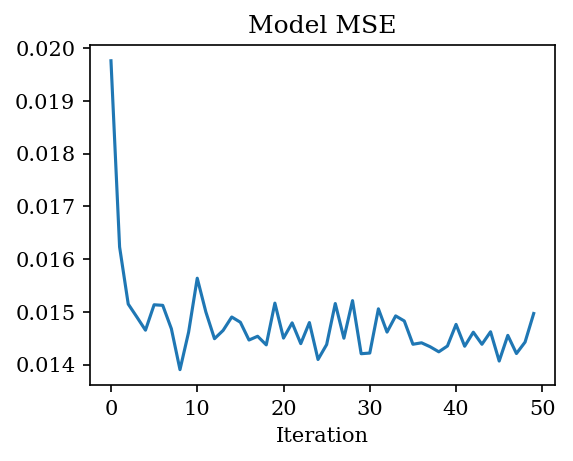

In [284]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(mse_history)
plt.title('Model MSE')
plt.xlabel('Iteration')
plt.show()

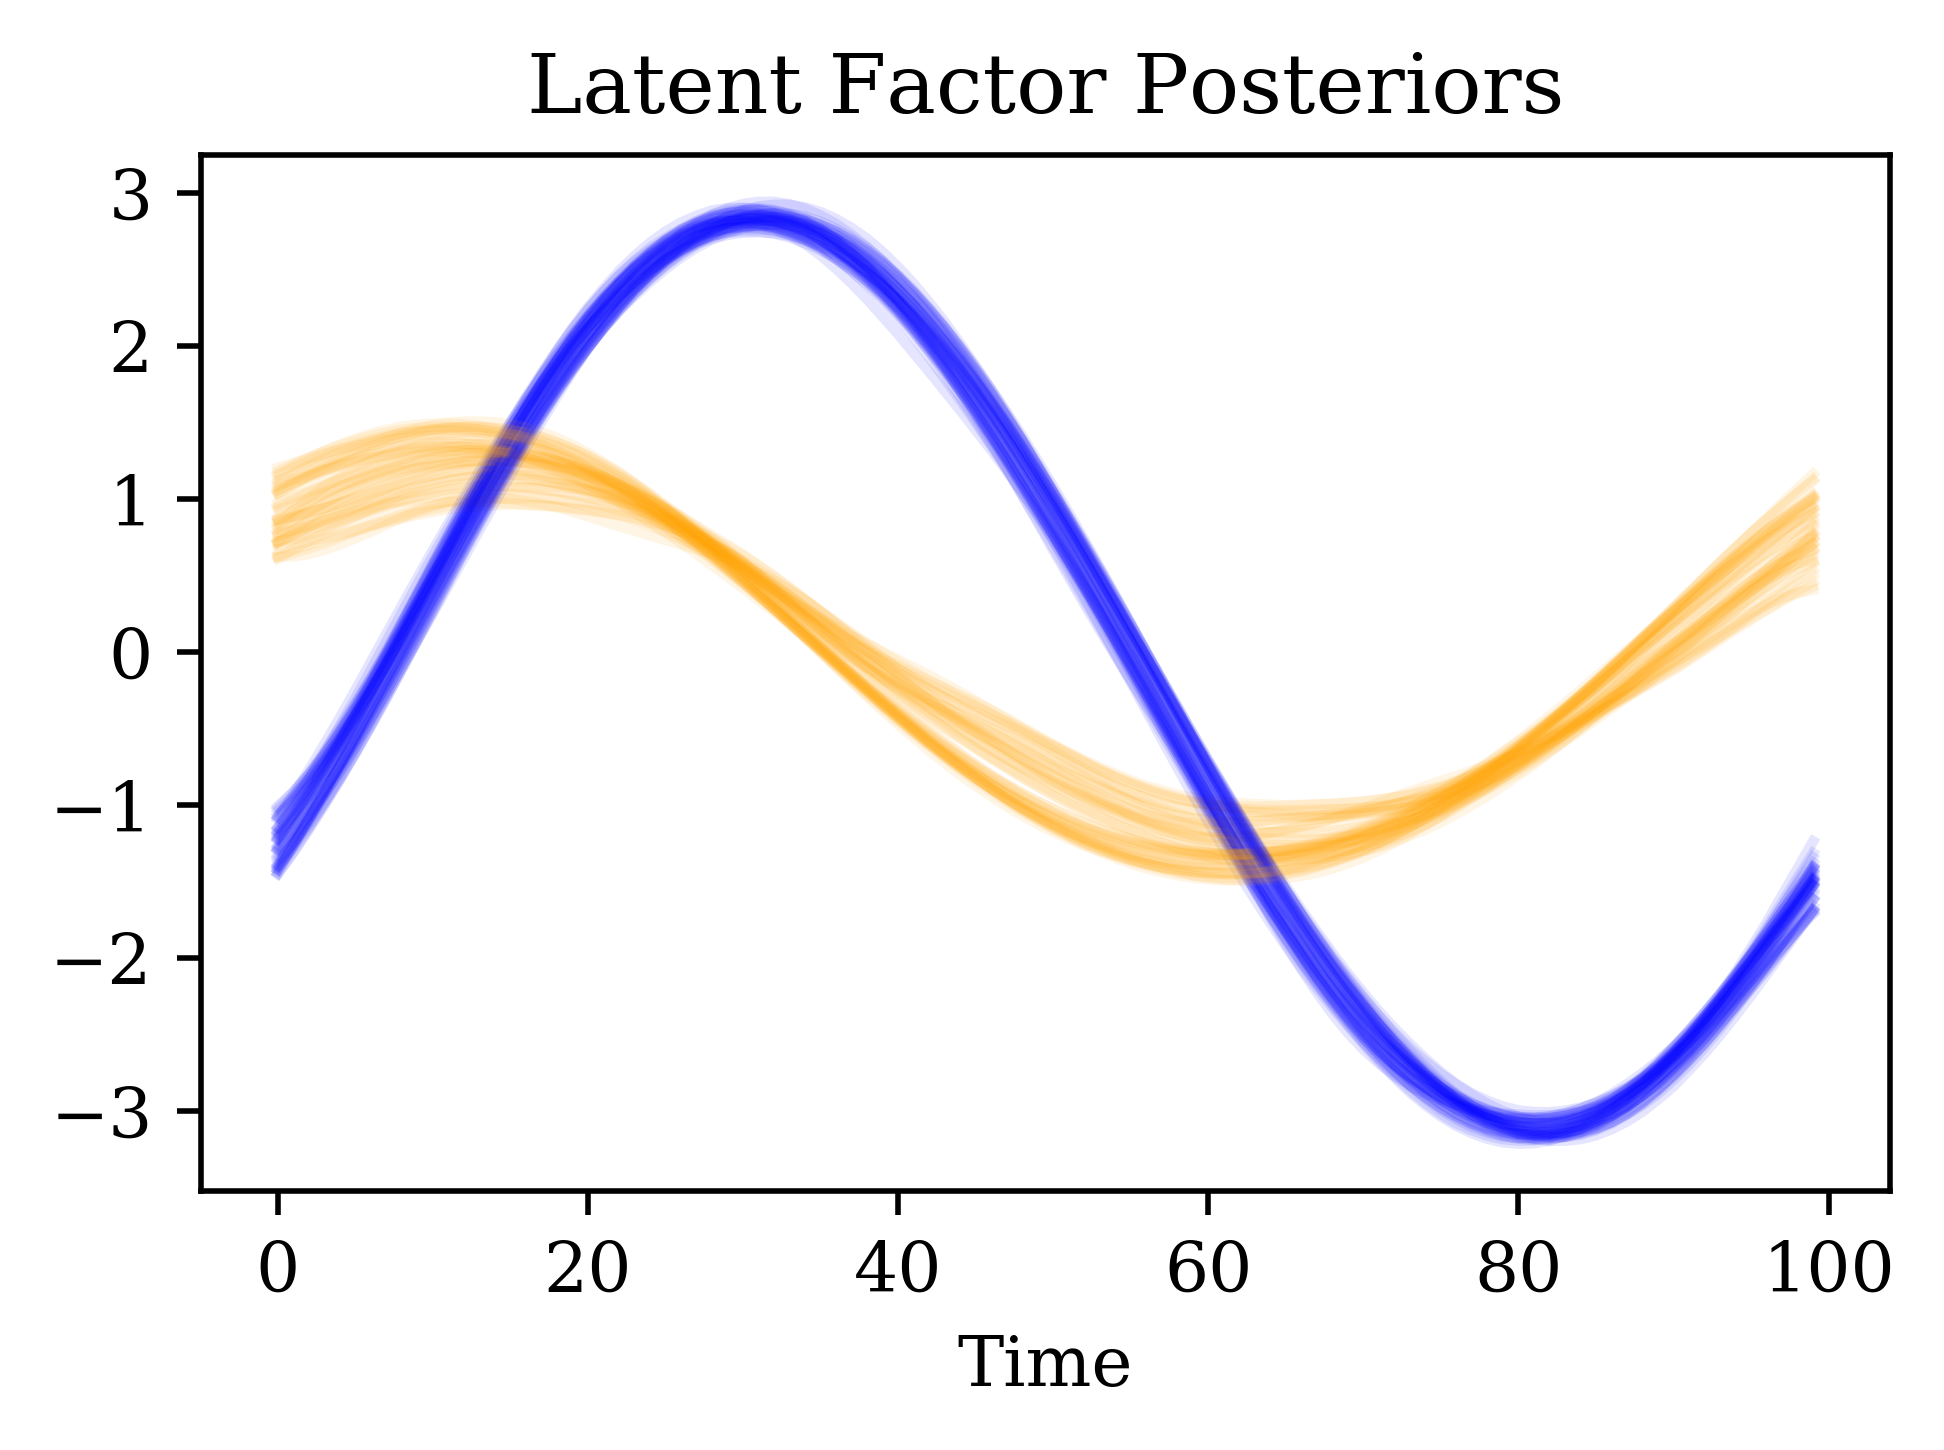

In [312]:
fig = plt.figure(figsize=(4, 3), dpi=500)
for i in range(10, 50):
    plt.plot(F_sample[i, :, 0], color='blue', alpha=0.1)
    plt.plot(F_sample[i, :, 1], color='orange', alpha=0.1)
plt.xlabel('Time')
plt.title('Latent Factor Posteriors')
fig.tight_layout()
plt.savefig('sine_latent.png')
plt.show()

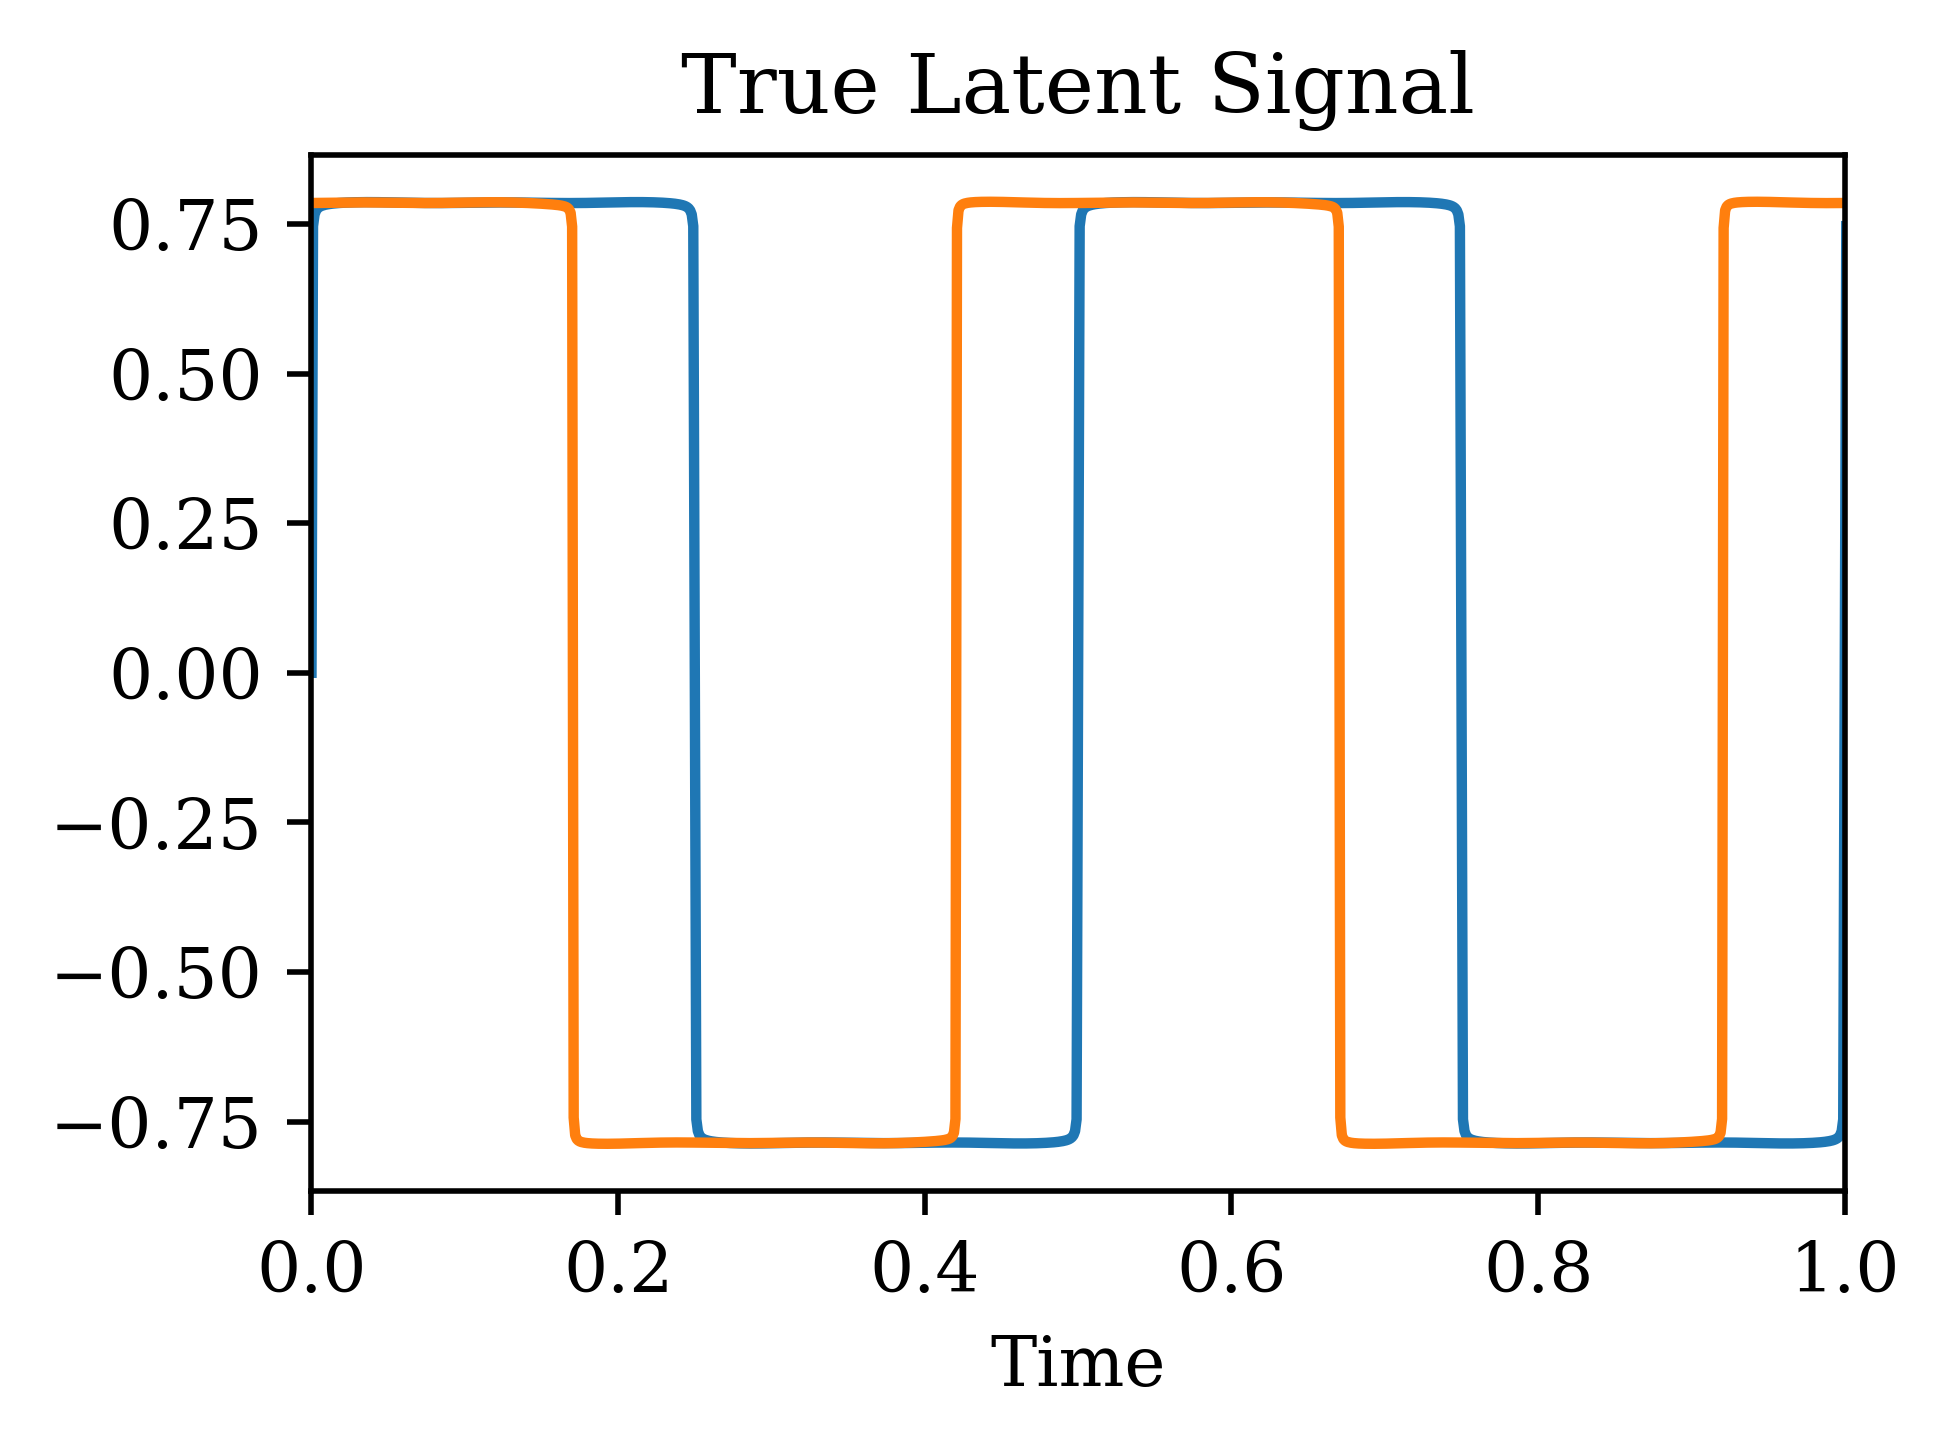

In [313]:
fig = plt.figure(figsize=(4, 3), dpi=500)
t = np.arange(0, 1.2, 0.001)
y1 = np.sin(4 * np.pi * t)
y2 = np.sin(4 * np.pi * t + 1.0)
for k in range(3, 1007, 2):
    y1 = y1 + np.sin(4 * np.pi * k * t) / k
    y2 = y2 + np.sin((4 * np.pi * t + 1.0) * k) / k
plt.plot(t, y1)
plt.plot(t, y2)
plt.xlim(0, 1)
plt.xlabel('Time')
plt.title('True Latent Signal')
fig.tight_layout()
plt.savefig('square_signal.png')
plt.show()

In [314]:
F = np.zeros((1200, 2))
F[:, 0] = y1
F[:, 1] = y2

In [315]:
log_series = np.matmul(F, B)
print(log_series.shape)

(1200, 15)


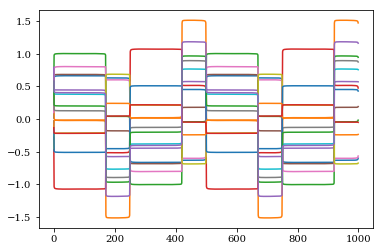

In [316]:
for j in range(15):
    plt.plot(log_series[:1000, j])
plt.show()

In [317]:
cov_series = np.zeros((1200, 5, 5))
for i in range(1200):
    cov_series[i, :, :] = expm(create_symmetric_matrix(log_series[i, :]))

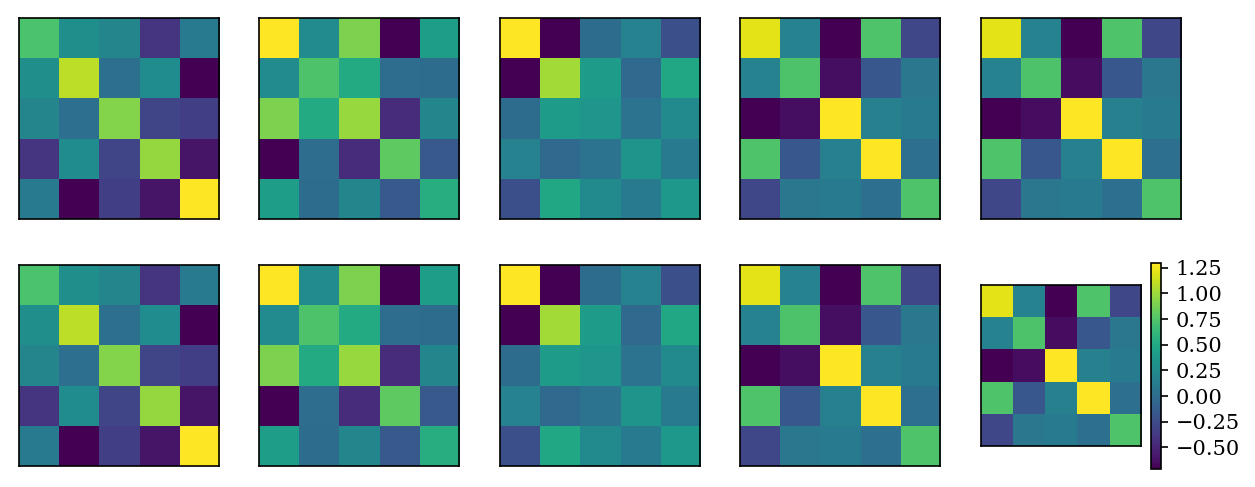

In [318]:
fig = plt.figure(figsize=(10, 4), dpi=150)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cov_series[i * 100, :, :])
    plt.xticks([])
    plt.yticks([])
plt.colorbar()
plt.show()

In [319]:
time_series = np.zeros((1200, 5))
for i in range(1200):
    time_series[i, :] = np.random.multivariate_normal(np.zeros(5), cov_series[i, :, :], 1)

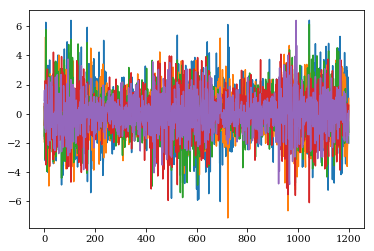

In [320]:
for j in range(5):
    plt.plot(time_series[:, j])
plt.show()

In [321]:
cov_series_hat = np.zeros((100, 5, 5))
log_series_hat = np.zeros((100, 15))
for t in range(100):
    sliding_window = time_series[(t * 10):(t * 10 + 100), :]
    cov_hat = np.cov(sliding_window, rowvar=False)
    cov_series_hat[t, :, :] = cov_hat
    log_hat = logm(cov_hat)[np.triu_indices(5)]
    log_series_hat[t, :] = log_hat

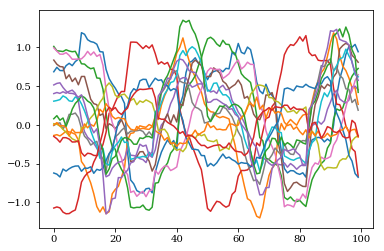

In [322]:
for j in range(15):
    plt.plot(log_series_hat[:, j])
plt.show()

In [323]:
Y = log_series_hat
print(Y.shape)

(100, 15)


In [324]:
dims = [1, 100, 15, 2]
model = FactorGP(dims)
model.update_conditional_latent(Y)

In [325]:
results = run_gibbs(Y, model, 50, 50, 0.5, verbose=True)

  2%|▏         | 1/50 [00:10<08:46, 10.74s/it]

Current MSE: 0.068002055333
Current length scale: [6.20485655 6.34543272]


  4%|▍         | 2/50 [00:21<08:32, 10.67s/it]

Current MSE: 0.0378538842755
Current length scale: [5.97761403 6.31041011]


  6%|▌         | 3/50 [00:31<08:22, 10.69s/it]

Current MSE: 0.0319671608817
Current length scale: [5.95224298 6.09477094]


  8%|▊         | 4/50 [00:43<08:23, 10.96s/it]

Current MSE: 0.0326374330021
Current length scale: [6.07348787 6.17483363]


 10%|█         | 5/50 [00:54<08:14, 11.00s/it]

Current MSE: 0.0331389809217
Current length scale: [6.47659758 6.36210561]


 12%|█▏        | 6/50 [01:04<07:54, 10.78s/it]

Current MSE: 0.0318245320305
Current length scale: [6.60746168 6.41373761]


 14%|█▍        | 7/50 [01:14<07:30, 10.47s/it]

Current MSE: 0.0318189354186
Current length scale: [7.05315873 6.36720612]


 16%|█▌        | 8/50 [01:24<07:13, 10.33s/it]

Current MSE: 0.0329370242578
Current length scale: [7.20678224 6.24187406]


 18%|█▊        | 9/50 [01:34<07:02, 10.31s/it]

Current MSE: 0.0324812754562
Current length scale: [7.12256226 6.21341891]


 20%|██        | 10/50 [01:46<07:09, 10.74s/it]

Current MSE: 0.0336226474753
Current length scale: [7.04818288 6.25931341]


 22%|██▏       | 11/50 [01:57<07:01, 10.81s/it]

Current MSE: 0.0322640182118
Current length scale: [6.86537673 6.08501103]


 24%|██▍       | 12/50 [02:08<06:49, 10.78s/it]

Current MSE: 0.0331434995347
Current length scale: [6.92645802 6.22753503]


 26%|██▌       | 13/50 [02:19<06:39, 10.79s/it]

Current MSE: 0.032250359709
Current length scale: [6.82701803 6.27863581]


 28%|██▊       | 14/50 [02:29<06:27, 10.75s/it]

Current MSE: 0.0322462984086
Current length scale: [6.47386315 6.31283072]


 30%|███       | 15/50 [02:40<06:14, 10.69s/it]

Current MSE: 0.0317746382458
Current length scale: [6.29052975 6.37288954]


 32%|███▏      | 16/50 [02:51<06:04, 10.72s/it]

Current MSE: 0.0315767112147
Current length scale: [6.29189355 6.26391336]


 34%|███▍      | 17/50 [03:01<05:54, 10.73s/it]

Current MSE: 0.0320207248265
Current length scale: [6.26938704 6.47599483]


 36%|███▌      | 18/50 [03:12<05:44, 10.76s/it]

Current MSE: 0.0322600314178
Current length scale: [6.09420065 6.26046986]


 38%|███▊      | 19/50 [03:23<05:32, 10.73s/it]

Current MSE: 0.0323460507198
Current length scale: [6.19171652 6.20968818]


 40%|████      | 20/50 [03:33<05:14, 10.48s/it]

Current MSE: 0.0318162109243
Current length scale: [6.33487236 6.25591232]


 42%|████▏     | 21/50 [03:43<05:05, 10.52s/it]

Current MSE: 0.0319061860906
Current length scale: [6.62337513 6.56555822]


 44%|████▍     | 22/50 [03:53<04:50, 10.37s/it]

Current MSE: 0.0326003552218
Current length scale: [6.18627471 6.64372009]


 46%|████▌     | 23/50 [04:04<04:37, 10.29s/it]

Current MSE: 0.0325533959804
Current length scale: [6.43410617 6.44610704]


 48%|████▊     | 24/50 [04:14<04:30, 10.41s/it]

Current MSE: 0.0326129195014
Current length scale: [6.31271864 6.69259699]


 50%|█████     | 25/50 [04:25<04:20, 10.42s/it]

Current MSE: 0.0327474080575
Current length scale: [6.33714647 6.43625652]


 52%|█████▏    | 26/50 [04:35<04:08, 10.35s/it]

Current MSE: 0.0314563954537
Current length scale: [6.4877436  6.30172747]


 54%|█████▍    | 27/50 [04:45<03:55, 10.24s/it]

Current MSE: 0.0320356883225
Current length scale: [6.2831244  6.15357454]


 56%|█████▌    | 28/50 [04:55<03:43, 10.14s/it]

Current MSE: 0.0322618499748
Current length scale: [6.28540389 6.28077803]


 58%|█████▊    | 29/50 [05:05<03:36, 10.30s/it]

Current MSE: 0.0325957151148
Current length scale: [6.41231993 6.15004193]


 60%|██████    | 30/50 [05:16<03:26, 10.33s/it]

Current MSE: 0.0319393555605
Current length scale: [6.81387181 5.90995679]


 62%|██████▏   | 31/50 [05:26<03:17, 10.39s/it]

Current MSE: 0.0319558323769
Current length scale: [6.84838027 5.89162055]


 64%|██████▍   | 32/50 [05:37<03:07, 10.42s/it]

Current MSE: 0.0325853641615
Current length scale: [6.87995867 5.97788626]


 66%|██████▌   | 33/50 [05:47<02:53, 10.20s/it]

Current MSE: 0.0326117757749
Current length scale: [6.970999   5.79193232]


 68%|██████▊   | 34/50 [05:56<02:41, 10.09s/it]

Current MSE: 0.0321127698647
Current length scale: [6.68542498 5.91664297]


 70%|███████   | 35/50 [06:06<02:30, 10.04s/it]

Current MSE: 0.0323528766615
Current length scale: [6.59683489 5.94814048]


 72%|███████▏  | 36/50 [06:17<02:22, 10.18s/it]

Current MSE: 0.032056279768
Current length scale: [6.51573767 6.12653321]


 74%|███████▍  | 37/50 [06:28<02:15, 10.39s/it]

Current MSE: 0.0326988433134
Current length scale: [6.54902347 6.15696267]


 76%|███████▌  | 38/50 [06:38<02:04, 10.40s/it]

Current MSE: 0.0321891894855
Current length scale: [6.8075392  6.31904266]


 78%|███████▊  | 39/50 [06:48<01:52, 10.20s/it]

Current MSE: 0.0324393997828
Current length scale: [6.38082007 6.30686292]


 80%|████████  | 40/50 [06:58<01:42, 10.23s/it]

Current MSE: 0.0326522555919
Current length scale: [6.3850925  6.55745393]


 82%|████████▏ | 41/50 [07:08<01:31, 10.16s/it]

Current MSE: 0.0319220270385
Current length scale: [6.23225647 6.52066083]


 84%|████████▍ | 42/50 [07:20<01:25, 10.68s/it]

Current MSE: 0.0319104499397
Current length scale: [6.03243789 6.35580438]


 86%|████████▌ | 43/50 [07:31<01:14, 10.69s/it]

Current MSE: 0.0317072305388
Current length scale: [6.27130617 6.55632197]


 88%|████████▊ | 44/50 [07:43<01:06, 11.09s/it]

Current MSE: 0.0319909524734
Current length scale: [6.09485229 6.4983115 ]


 90%|█████████ | 45/50 [07:54<00:56, 11.24s/it]

Current MSE: 0.0325796072144
Current length scale: [6.33482198 6.56870907]


 92%|█████████▏| 46/50 [08:06<00:45, 11.29s/it]

Current MSE: 0.032308353625
Current length scale: [6.12818008 6.76133251]


 94%|█████████▍| 47/50 [08:17<00:33, 11.24s/it]

Current MSE: 0.0323891146531
Current length scale: [6.32997829 6.55602031]


 96%|█████████▌| 48/50 [08:28<00:22, 11.27s/it]

Current MSE: 0.0322661251939
Current length scale: [6.39981263 6.3855572 ]


 98%|█████████▊| 49/50 [08:40<00:11, 11.33s/it]

Current MSE: 0.0318791075006
Current length scale: [6.48137186 6.8601239 ]


100%|██████████| 50/50 [08:51<00:00, 11.29s/it]

Current MSE: 0.0316775012849
Current length scale: [6.19204233 6.70133268]


In [326]:
F_sample, loading_sample, variance_sample, theta_sample, traces_hist, mse_history = results

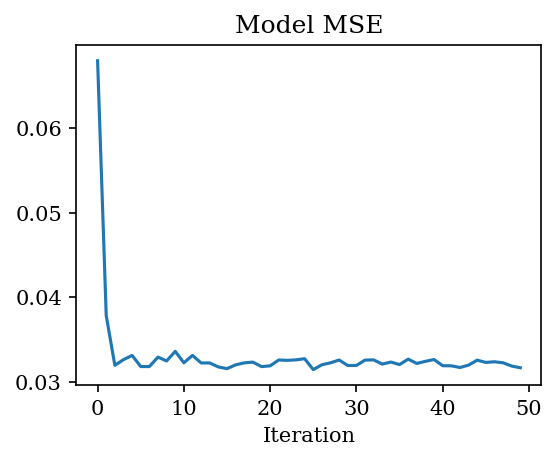

In [327]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(mse_history)
plt.title('Model MSE')
plt.xlabel('Iteration')
plt.show()

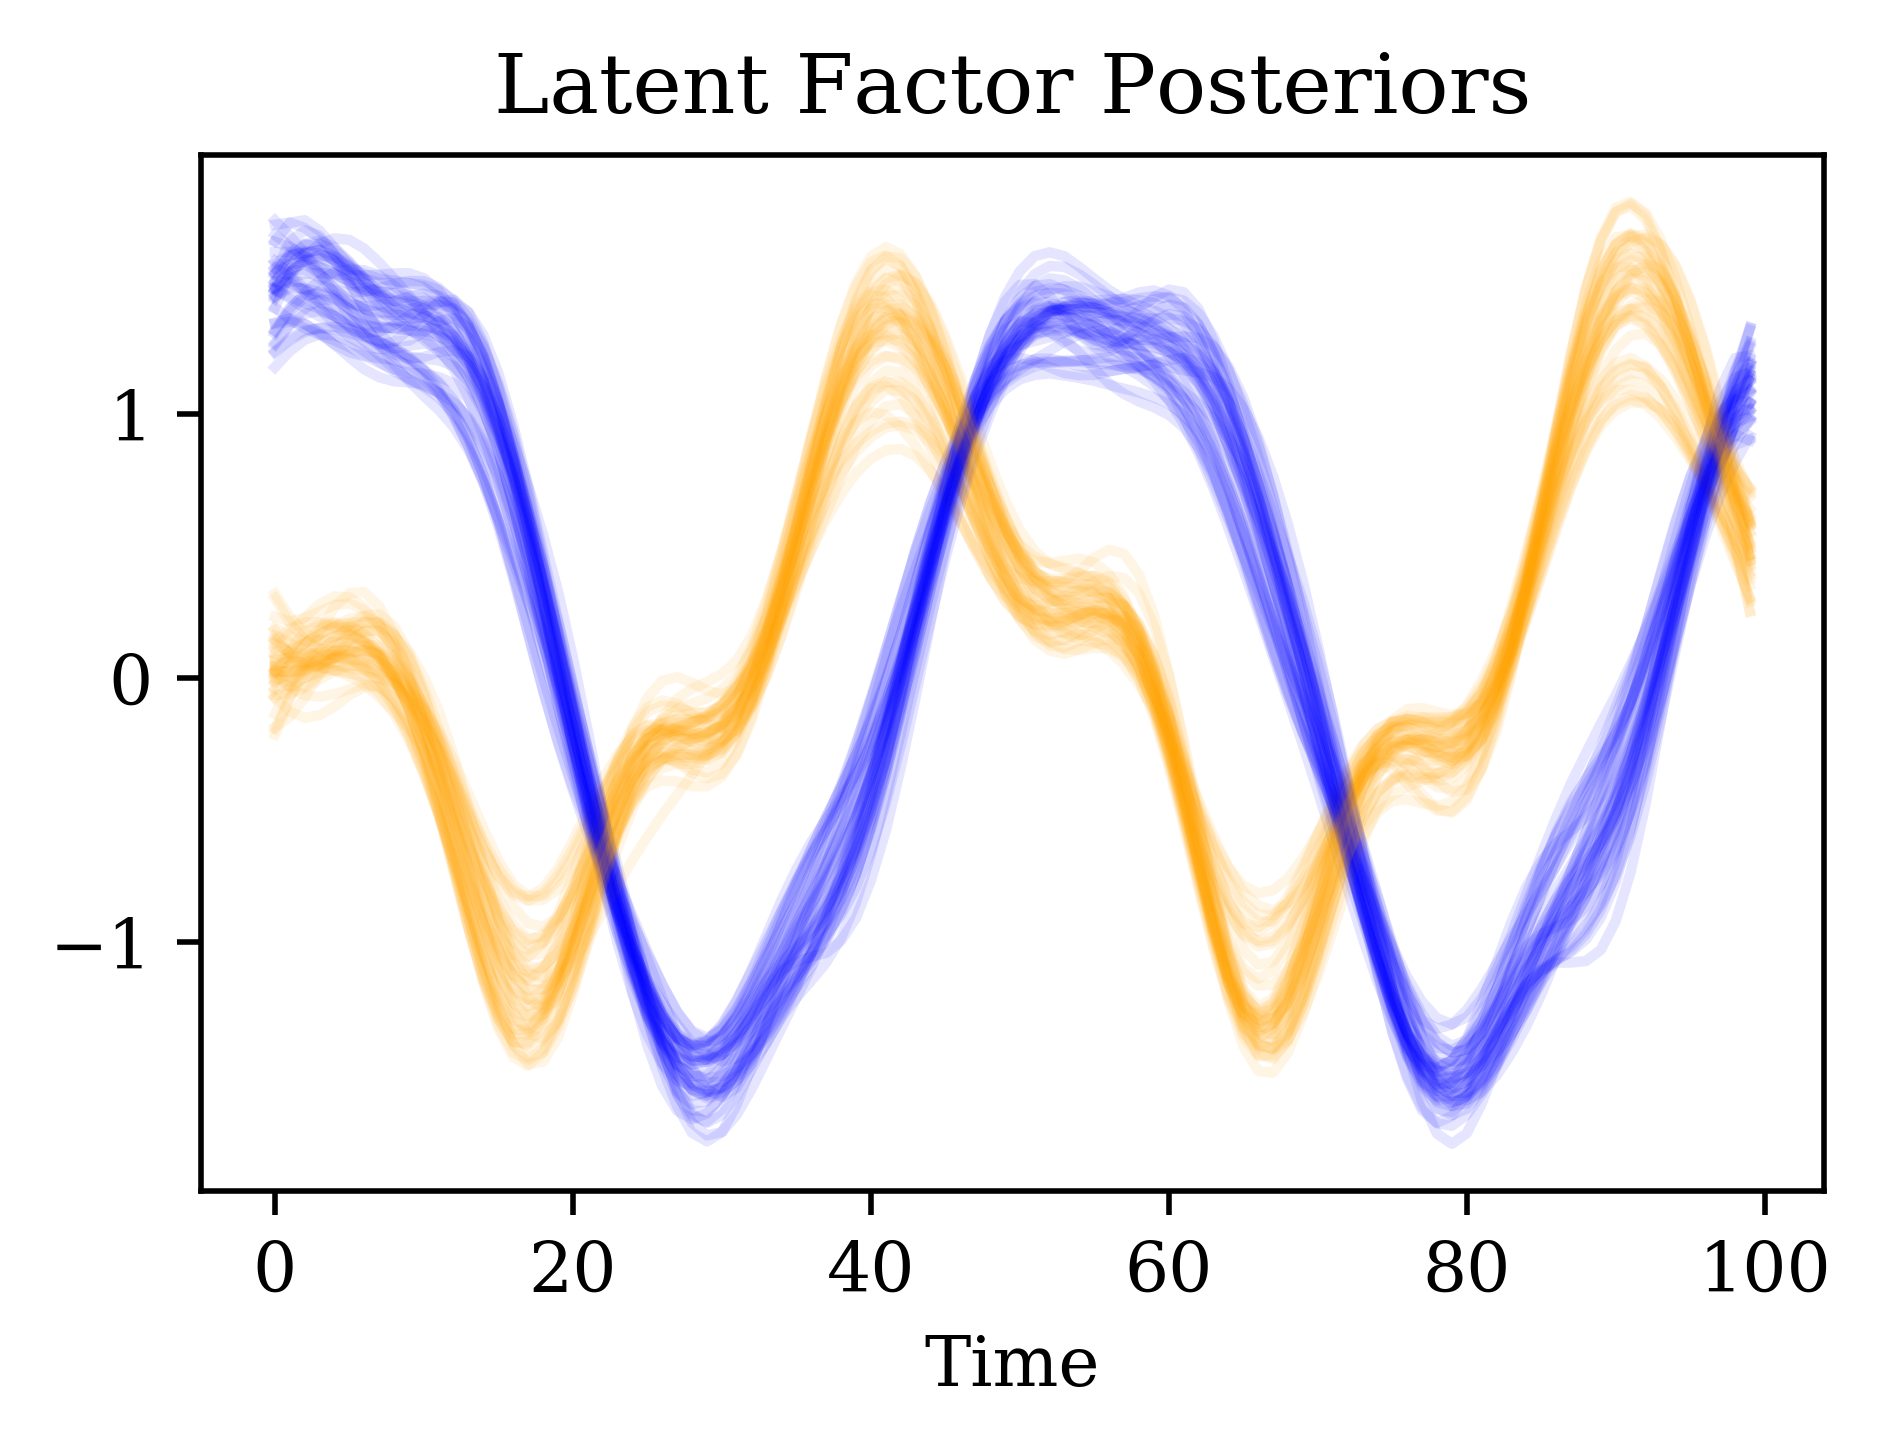

In [331]:
fig = plt.figure(figsize=(4, 3), dpi=500)
for i in range(10, 50):
    plt.plot(F_sample[i, :, 0], color='orange', alpha=0.1)
    plt.plot(F_sample[i, :, 1], color='blue', alpha=0.1)
plt.xlabel('Time')
plt.title('Latent Factor Posteriors')
fig.tight_layout()
plt.savefig('square_latent.png')
plt.show()